In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import data_receiver

# define constants

In [28]:
DT = 20 # ms

# calculate velocity

In [157]:
r = data_receiver.Receiver()

data = []

for line in r.receive():
    data.append(line.split(','))

data = np.array(data, dtype = np.float)

## filter out gravity with a low pass filter

In [161]:
a = data[:, 0:3]

n, s = scipy.signal.butter(10, 0.1, 'lowpass') 
a_filtered = scipy.signal.filtfilt(n, s, a[:, 0])
a_filtered = np.array(a_filtered)

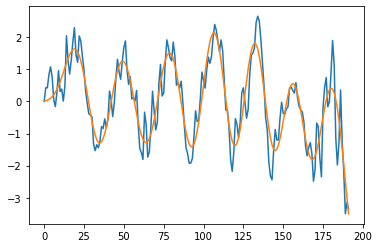

In [162]:
plt.plot(a[:, 0])
plt.plot(a_filtered)

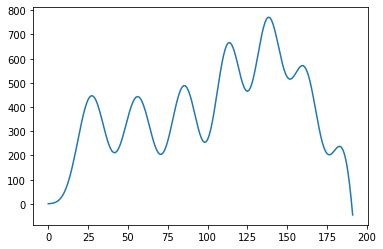

In [163]:
v_acc = 0
v = []
n = np.arange(0, len(a_filtered))
for ax in a_filtered:
    v_acc = v_acc + ax * DT
    v.append(v_acc)

v = np.array(v)
plt.plot(n, v)